In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [1]:
file_path = "/content/dataset-234.xlsx"

with open(file_path, "rb") as f:
    print(f.read(200))  # show first 200 bytes


b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


In [2]:
import pandas as pd

df = pd.read_excel("/content/dataset-234.xlsx", engine="openpyxl")
print(df.shape)
print(df.head())


(7789, 11)
  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.duplicated().value_counts()

,count
False,7787


In [5]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().value_counts()

,count
False,7787


In [8]:
df['Show_Id'] = df['Show_Id'].astype(str)
df[['Category','Title','Director','Cast','Country','Rating','Type','Description']] = df[['Category','Title','Director','Cast','Country','Rating','Type','Description']].astype(str).apply(lambda x: x.str.strip())
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'].str.extract(r'(\d+)')[0], errors='coerce')
df['year'] = df['Release_Date'].dt.year


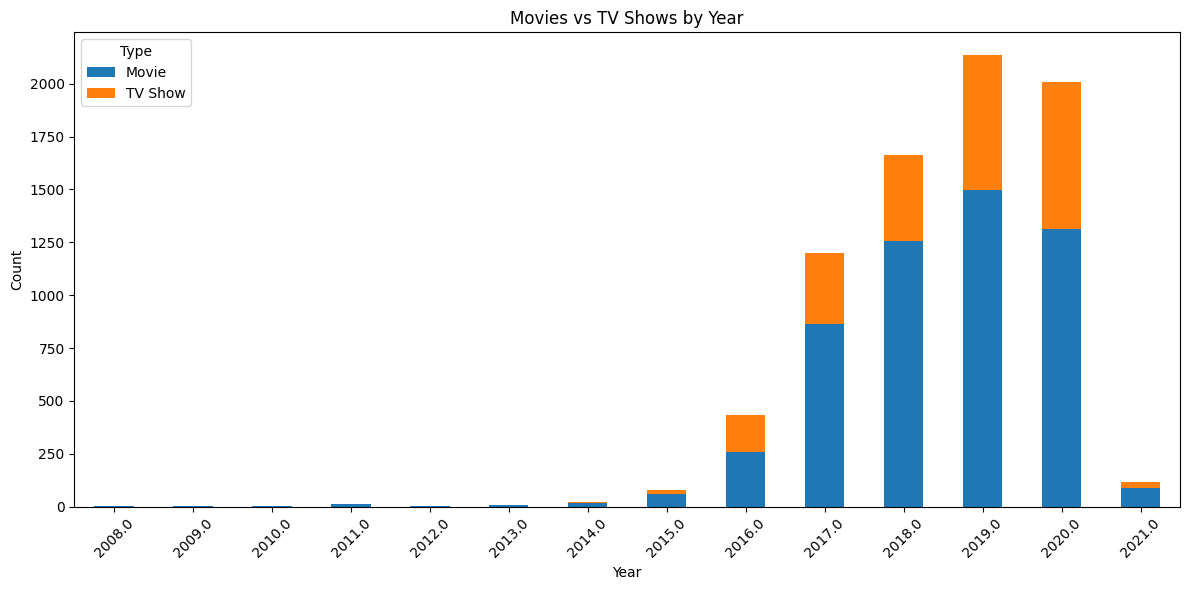

In [11]:

df['Main_Type'] = df['Category'].fillna('Unknown').str.strip()

mv_tv = df.groupby(['year', 'Main_Type']).size().reset_index(name='count')
mv_tv_pivot = mv_tv.pivot(index='year', columns='Main_Type', values='count').fillna(0)

if not mv_tv_pivot.empty:
    mv_tv_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title("Movies vs TV Shows by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No data available to plot.")


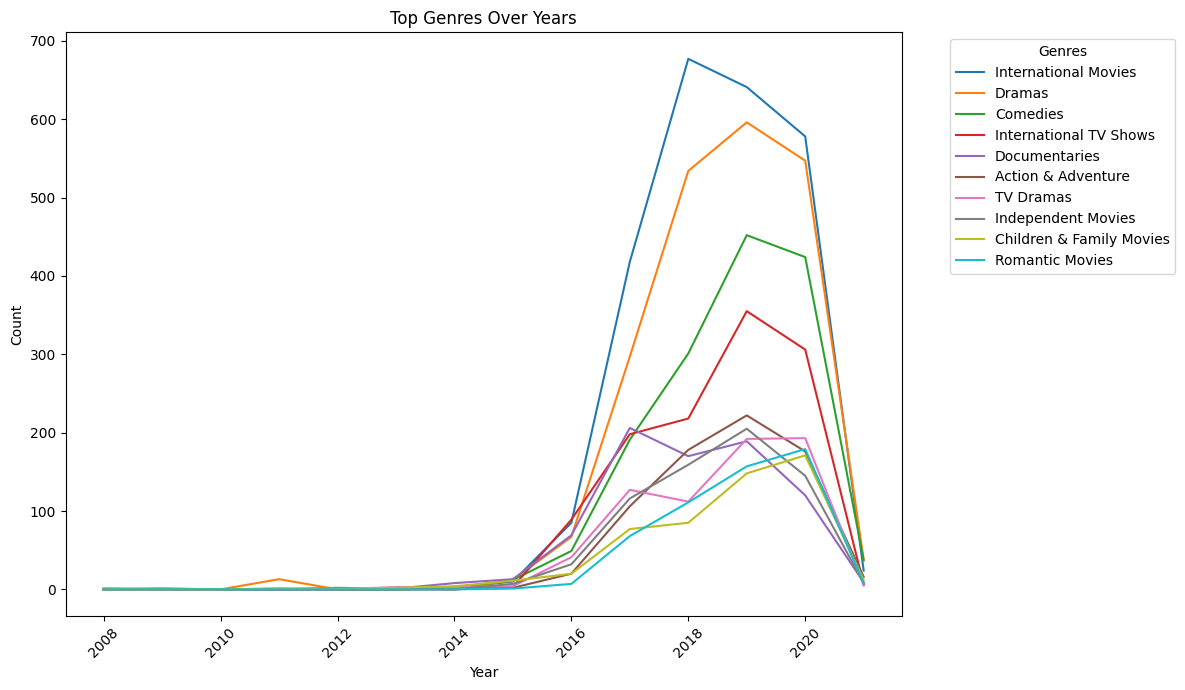

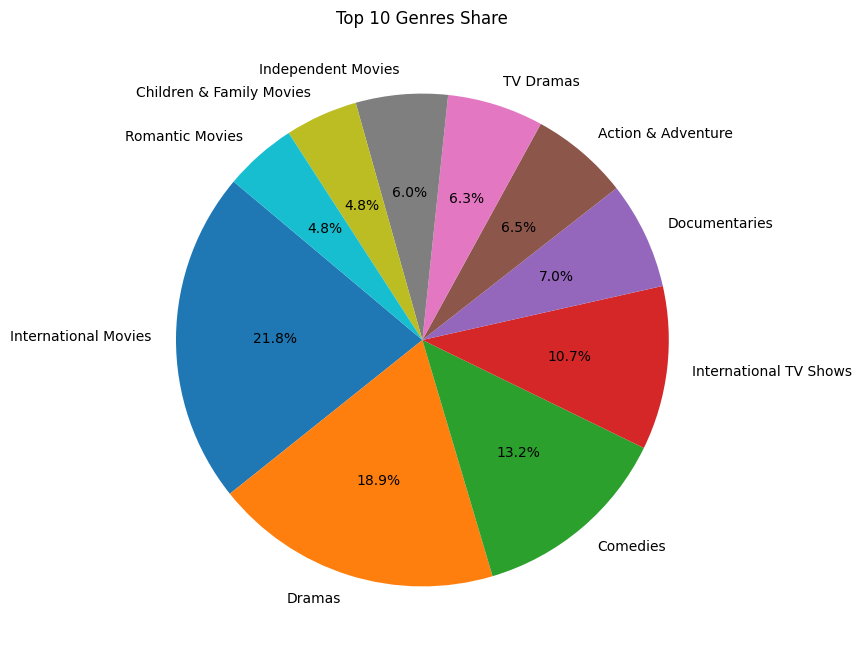

In [13]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

df['genres_list'] = df['Type'].str.split(', ')

all_genres = Counter(g for sublist in df['genres_list'] for g in sublist)
top_genres = [g for g,_ in all_genres.most_common(10)]
years = sorted(df['year'].dropna().unique())

genre_data = {g: [] for g in top_genres}
for y in years:
    sub = df[df['year'] == y]
    counts = Counter(g for sublist in sub['genres_list'] for g in sublist)
    for g in top_genres:
        genre_data[g].append(counts.get(g,0))

genre_df = pd.DataFrame(genre_data, index=years)
genre_df.plot(figsize=(12,7))
plt.title("Top Genres Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genres", bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

labels, sizes = zip(*all_genres.most_common(10))
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Genres Share")
plt.show()

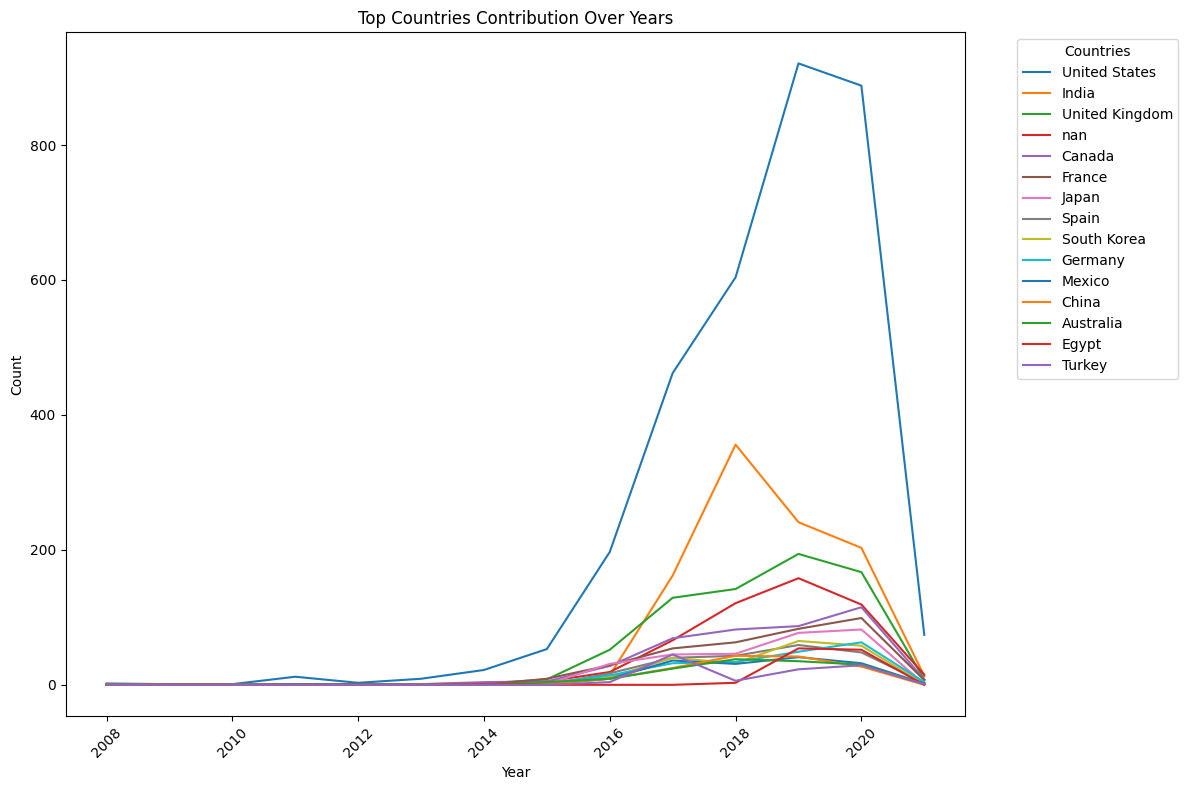

In [15]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

df['country_list'] = df['Country'].str.split(', ')

all_countries = Counter(c for sublist in df['country_list'] for c in sublist)
top_countries = [c for c,_ in all_countries.most_common(15)]
years = sorted(df['year'].dropna().unique())

country_data = {c: [] for c in top_countries}
for y in years:
    sub = df[df['year'] == y]
    counts = Counter(c for sublist in sub['country_list'] for c in sublist)
    for c in top_countries:
        country_data[c].append(counts.get(c,0))

country_df = pd.DataFrame(country_data, index=years)
country_df.plot(figsize=(12,8))
plt.title("Top Countries Contribution Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Countries", bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

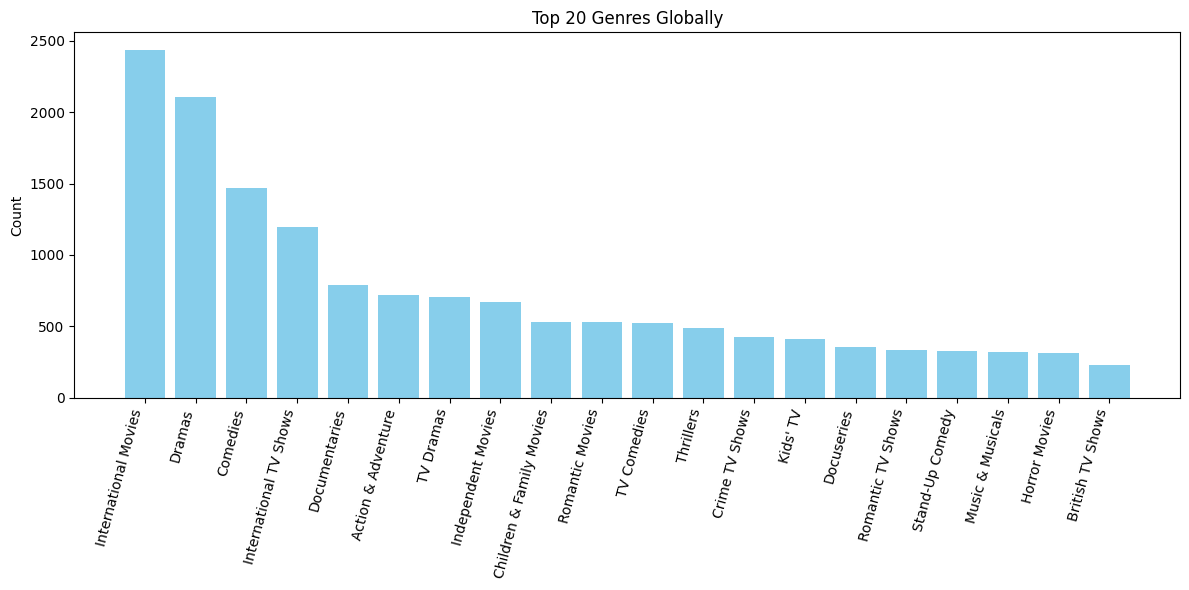

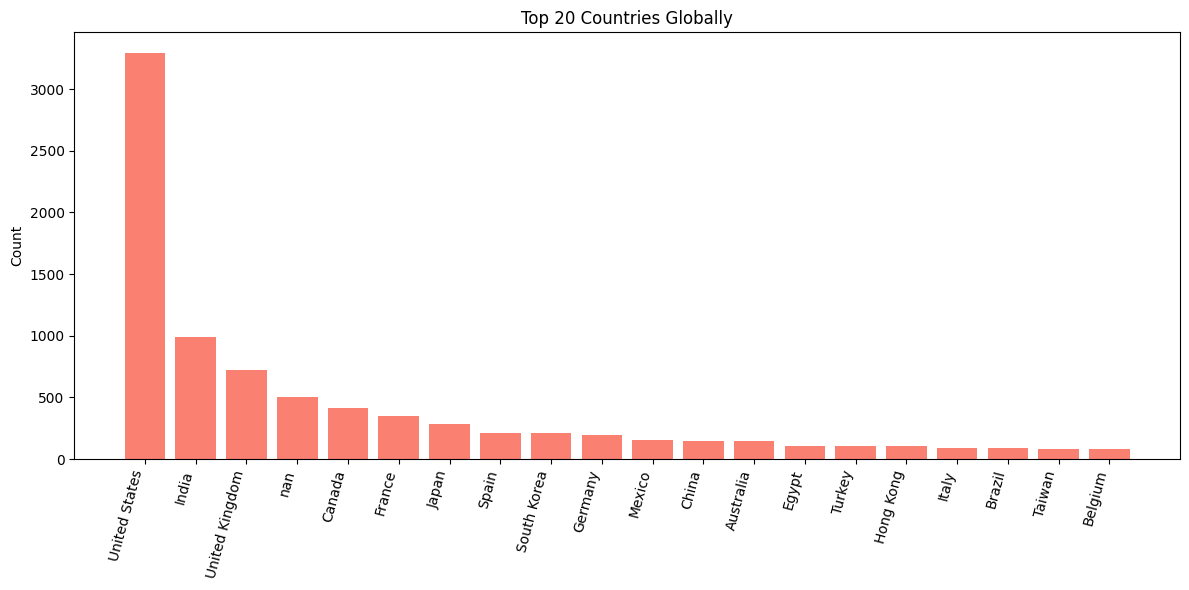

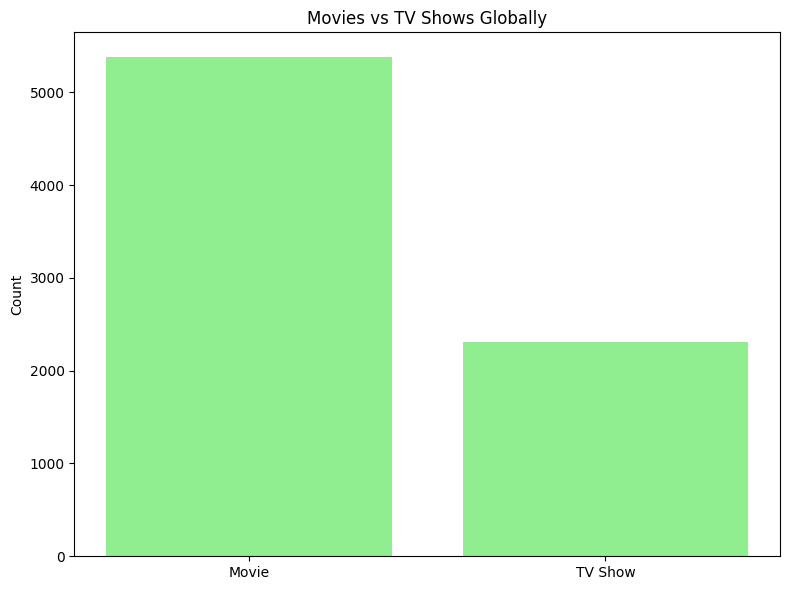

In [17]:
import matplotlib.pyplot as plt

# Create dataframes for global counts
top_genres_global = pd.DataFrame(all_genres.most_common(), columns=['Genre', 'Count'])
top_countries_global = pd.DataFrame(all_countries.most_common(), columns=['Country', 'Count'])
movies_vs_tv_global = mv_tv.groupby('Main_Type').sum().reset_index().rename(columns={'Main_Type': 'Type', 'count': 'Count'})

# Top 20 Genres
plt.figure(figsize=(12,6))
plt.bar(top_genres_global['Genre'].head(20), top_genres_global['Count'].head(20), color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.title("Top 20 Genres Globally")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top 20 Countries
plt.figure(figsize=(12,6))
plt.bar(top_countries_global['Country'].head(20), top_countries_global['Count'].head(20), color='salmon')
plt.xticks(rotation=75, ha='right')
plt.title("Top 20 Countries Globally")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Movies vs TV Shows
plt.figure(figsize=(8,6))
plt.bar(movies_vs_tv_global['Type'], movies_vs_tv_global['Count'], color='lightgreen')
plt.title("Movies vs TV Shows Globally")
plt.ylabel("Count")
plt.tight_layout()
plt.show()